# <center> LAB 2: Linear Classification: Logistic Regression<br> <small>Réda DEHAK<br> March 7th, 2023</small> </center>

The goal of this lab is :

    - Test the logistic regression on classification problems
    - Evaluate performances statistics.


## Part 1: Logistic Regression 
### Import Data

We will use the Wine dataset from UCI. These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of thirteen constituents found in each of the three types of wines.

# Loading and Plotting Data
 
First, we will use only two features from the data set: alcohol and ash (We can plot the solution in 2D space). The labels are supplied as an array of data with values from 1 to 3, but at first, we want a simple binary regression problem with a yes or no answer.  

We filter the data set, reducing it to only include wines with labels 1 or 2.  

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

data = pd.read_csv('data.txt')

reduced = data[data['class'] <= 2]
X = reduced[['alcohol', 'ash']].to_numpy()
y = label_binarize(reduced['class'].to_numpy(), classes=[1, 2])[:,0]

In [2]:
# split data into train and validation set
from sklearn.model_selection import train_test_split

# Change random_state to get different split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=25)
print('train:', len(Xtrain), 'test:', len(Xtest))

train: 97 test: 33


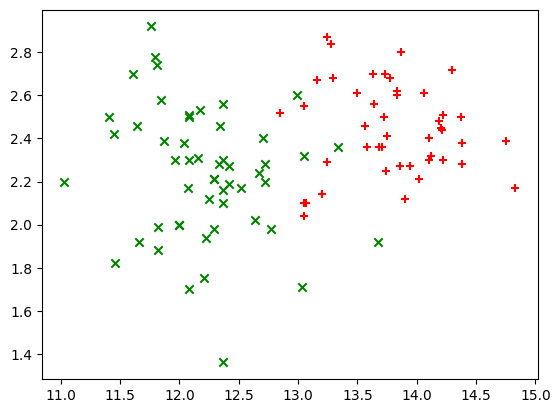

In [3]:
MARKERS = ['+', 'x', '.']
COLORS = ['red', 'green', 'blue']

def plot_points(xy, labels):
    
    for i, label in enumerate(set(labels)):
        points = np.array([xy[j,:] for j in range(len(xy)) if labels[j] == label])
        marker = MARKERS[i % len(MARKERS)]
        color = COLORS[i % len(COLORS)]
        plt.scatter(points[:,0], points[:,1], marker=marker, color=color)

plot_points(Xtrain, ytrain)

We can see that we can plot line that could divide the two colored points with a small amount of error.

# Logistic Regression

To implement logistic regression, we need to define the cost function $J(\theta)$, and compute the partial derivatives of $J(\theta)$. As we have seen previously:

$$
J(\theta) =-\frac{1}{N}\sum_{i=1}^{N}y^{i}\log(f_\theta(x^{i}))+(1-y^{i})\log(1-f_\theta(x^{i}))
$$

where $f_\theta(x)$ is the logistic function

$$
f_\theta(x) = \frac{1}{1 + e^{-\theta^Tx}}
$$

- Compute the partiel derivatives of $J(\theta)$ and write the two functions:
    - cost(theta, X, y) which compute the value of $J(\theta)$
    - gradient(theta, X, y) which compute the value of the gradient of $J(\theta)$

In [4]:
def sigmoid(theta, X):
    return 1 / (1 + np.exp(-X @ theta))

def cost(theta, X, y):
    theta = theta[:,None]
    y = y[:,None]
    
    hyp = sigmoid(theta, X)
    pos = np.multiply(y, np.log(hyp))
    neg = np.multiply((1 - y), np.log(1 - hyp))
    
    return -np.sum(pos + neg) / (len(X))

def gradient(theta, X, y):
    theta = theta[:,None]
    y = y[:,None]
    
    error = sigmoid(theta, X) - y
    return X.T.dot(error) / len(X)

- Using the function scipy.optimize.fmin_tnc which performs a gradient descent algorithm, write a function Train(x, y) which compute $\theta$ that minimize $J(\theta)$

In [5]:
from scipy.optimize import fmin_tnc  

def train(X, y, maxfun=None):
    X = np.insert(X, 0, np.ones(len(X)), axis=1)
    theta = np.zeros(X.shape[1])
    result = fmin_tnc(func=cost, x0=theta, fprime=gradient, disp=5, args=(X, y), maxfun=maxfun)
    print("fmin_tnc result: ", result)
    
    return result[0]

- compute the value of the best $\theta$

In [6]:
W = train(Xtrain, ytrain)
print('w = ', W)

fmin_tnc result:  (array([81.8483549 , -5.66066161, -3.49161414]), 67, 1)
w =  [81.8483549  -5.66066161 -3.49161414]


  NIT   NF   F                       GTG
    0    1  6.931471805599453E-01   8.50256403E-03
    1    3  6.930340493311801E-01   1.38496522E-03
tnc: fscale = 26.8708
    2    5  6.929209791623585E-01   8.48931948E-03
tnc: stepmx = 1000
    3    7  4.959854817646130E-01   3.84915291E-03
    4    9  4.765293359649215E-01   1.12363043E+00
tnc: fscale = 0.943383
    5   11  4.603418052577846E-01   1.17749374E-03
tnc: fscale = 29.1421
    6   13  4.600094052275952E-01   2.18996096E-02
    7   15  4.128171903210294E-01   1.03556490E-02
    8   17  4.104286252485735E-01   1.45067587E-03
    9   19  4.088067477718659E-01   1.32440729E-01
   10   22  1.622082510605112E-01   4.95514426E-03
   11   24  1.616004613069612E-01   1.72317869E-04
   12   29  1.442492111953174E-01   1.50335496E-03
   13   31  1.441114632326792E-01   1.09232883E-04
   14   33  1.438064667497563E-01   4.47340681E-05
   15   35  1.437280814212840E-01   1.24366563E-03
   16   37  1.409552918707297E-01   6.66511609E-05
   17 

- Plot the boundary and checks that it is linear?

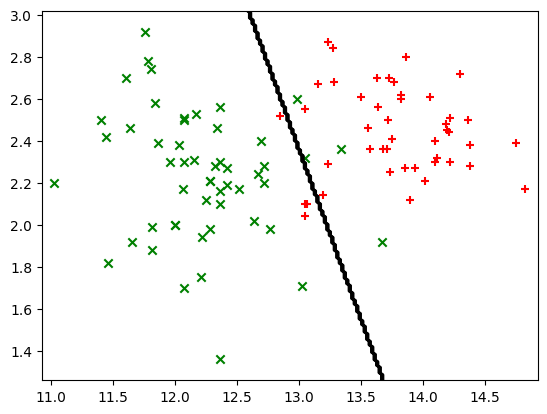

In [7]:
def predict(theta, X):
    X = np.insert(X, 0, np.ones(len(X)), axis=1)
    return (sigmoid(theta, X) >= 0.5).astype(int)

def plot_boundary(X, pred):
    
    x_min, x_max = X[:,0].min() - .1, X[:,0].max() + .1
    y_min, y_max = X[:,1].min() - .1, X[:,1].max() + .1
    
    xs, ys = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    xys = np.column_stack([xs.ravel(), ys.ravel()])
    zs = pred(xys).reshape(xs.shape)
    plt.contour(xs, ys, zs, colors='black')
  
plot_boundary(Xtrain, lambda x: predict(W, x))
plot_points(Xtrain, ytrain)

- Using sklearn.metrics, compute the confusion matrix

In [8]:
import sklearn.metrics as metrics

predictions = predict(W, Xtest)
confmat = metrics.confusion_matrix(ytest, predictions)
print('confusion matrix: ', confmat)
print("Normalized Confusion Matrix: ", metrics.confusion_matrix(ytest, predict(W,Xtest), normalize='true'))

confusion matrix:  [[14  0]
 [ 2 17]]
Normalized Confusion Matrix:  [[1.         0.        ]
 [0.10526316 0.89473684]]


- Compute all performance metrics that has been defined during the lecture

In [9]:
TP = confmat[1,1]
FP = confmat[0,1]
FN = confmat[1,0]
TN = confmat[0,0]

accuracy = (TP + TN) / np.sum(confmat)
TPR = TP / (TP + FN)
FAR = FP / (TN + FP)
FNR = FN / (TP + FN)
TNR = TN / (TN + FP)
precision = TP / (TP + FP)
FDR = FP / (TP + FP)
PPV = TP / (TP + FP)
NPV = TN / (TN + FN)
f_score = precision * TPR
f1_score = (2 * precision * TPR) / (precision + TPR)

print('Accuracy = {}, {}'.format(accuracy, metrics.accuracy_score(ytest, predictions)))
print('Recall = Sensitivity = True Positive Rate(TPR) = {}, {}'.format(TPR, metrics.recall_score(ytest, predictions)))
print(f'False Alarm Rate (FAR) = False Positive Rate(FPR) = {FAR}')
print(f'Missed Detection Rate(MISS) = False Negative Rate(FNR) = {FNR}')
print(f'Speciaicity = True Negative Rate(TNR) = {TNR}')
print('Precision = {}, {}'.format(precision, metrics.precision_score(ytest, predictions)))
print(f'False Discovery Rate (FDR) = {FDR}')
print(f'Positive Predictive Value (PPV) = {PPV}')
print(f'Negative Predictive Value (NPV) = {NPV}')
print(f'F−Score = Precision × Recall = {f_score}')
print('F1-Score = (2 * Recall * Precision) / (Recall + Precision) = {}, {}'.format(f1_score, metrics.f1_score(ytest, predictions)))

Accuracy = 0.9393939393939394, 0.9393939393939394
Recall = Sensitivity = True Positive Rate(TPR) = 0.8947368421052632, 0.8947368421052632
False Alarm Rate (FAR) = False Positive Rate(FPR) = 0.0
Missed Detection Rate(MISS) = False Negative Rate(FNR) = 0.10526315789473684
Speciaicity = True Negative Rate(TNR) = 1.0
Precision = 1.0, 1.0
False Discovery Rate (FDR) = 0.0
Positive Predictive Value (PPV) = 1.0
Negative Predictive Value (NPV) = 0.875
F−Score = Precision × Recall = 0.8947368421052632
F1-Score = (2 * Recall * Precision) / (Recall + Precision) = 0.9444444444444444, 0.9444444444444444


- Plot the ROC curve of your classifier

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC:  0.943609022556391


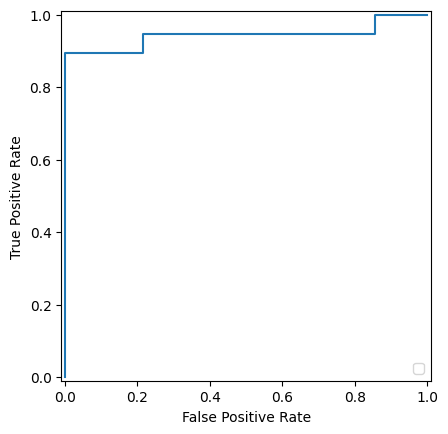

In [10]:
def score(theta, X):
    Z = np.hstack((np.ones((X.shape[0], 1)), X))
    return sigmoid(theta, Z)

fpr, tpr, _ = metrics.roc_curve(ytest, score(W, Xtest),drop_intermediate=False)

print("AUC: ", metrics.auc(fpr, tpr))

display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

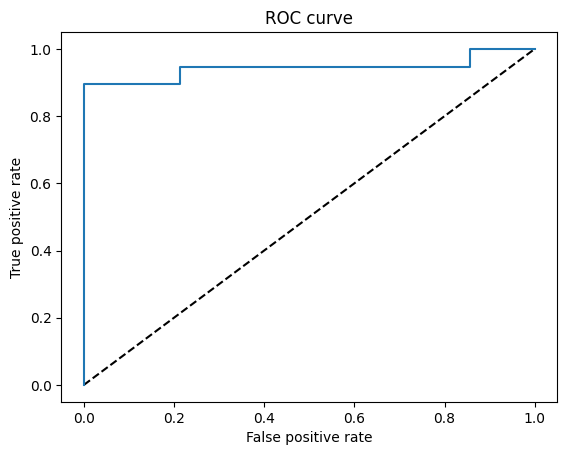

In [11]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

- Plot the Precision-Recall curve of your classifier

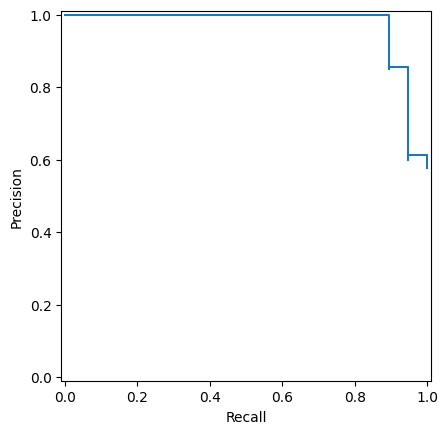

In [12]:
precision, recall, _ = metrics.precision_recall_curve(ytest, score(W, Xtest))
display = metrics.PrecisionRecallDisplay(precision=precision, recall=recall)
display.plot()
plt.show()

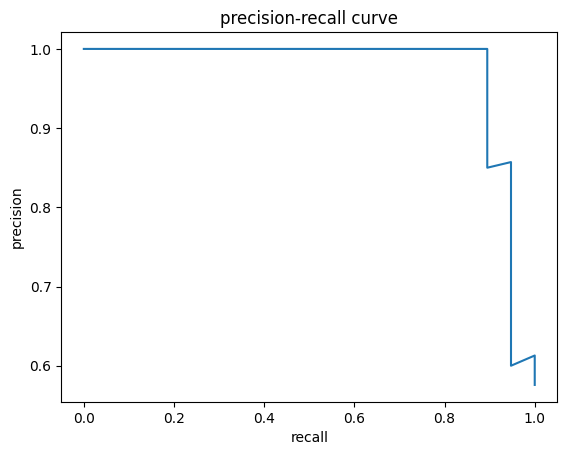

In [13]:
plt.figure(1)
plt.plot(recall, precision, label='Logistic Regression')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision-recall curve')
plt.show()

- How can we obtain a quadratic boundary? check it and plot the boundary?

fmin_tnc result:  (array([ 26.02236361,  26.02236361, -23.63679886, 130.56746666,
         1.69132316, -11.94774832,   4.9379545 ]), 545, 1)
[ 26.02236361  26.02236361 -23.63679886 130.56746666   1.69132316
 -11.94774832   4.9379545 ]


  NIT   NF   F                       GTG
    0    1  6.931471805599453E-01   1.64009529E+01
    1    7  1.401423610034772E-01   4.79720254E+00
    2   10  1.380387005913526E-01   5.40814931E-02
    3   14  1.373781993716918E-01   3.82679373E-05
tnc: fscale = 161.653
    4   20  1.332640969563078E-01   8.75069389E-01
tnc: fscale = 1.069
    5   23  1.328855427923790E-01   1.02219675E-05
tnc: fscale = 312.776
    6   27  1.328672814063254E-01   2.20871491E-04
    7   31  1.327733119390264E-01   1.93046771E-03
tnc: stepmx = 1000
    8   35  1.311046795998361E-01   2.98029016E-03
    9   39  1.310019799146540E-01   8.75969449E-04
   10   43  1.307155641480615E-01   5.03762201E-05
   11   46  1.299763481975483E-01   3.78565178E-03
   12   50  1.284427689915877E-01   1.77907506E-03
   13   53  1.278988817402874E-01   2.77909903E-02
tnc: fscale = 5.99857
   14   57  1.274052527462491E-01   9.63224679E-02
   15   60  1.273525946713680E-01   1.01970939E-05
tnc: fscale = 313.157
   16   64  1.27

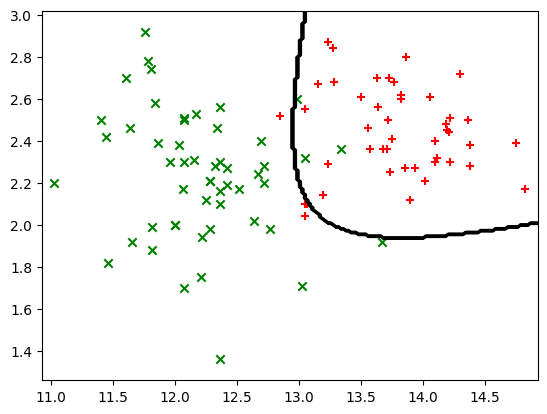

In [14]:
from sklearn.preprocessing import PolynomialFeatures

def transform(x):
    return PolynomialFeatures(2).fit_transform(x)
    #return np.vstack((x[:, 0] ** 2, x[:, 1] ** 2, x[:, 0] * x[:, 1], x[:,0], x[:, 1] )).T

W2 = train(transform(Xtrain), ytrain, maxfun = 1000)
print(W2)
plot_points(Xtrain, ytrain)
plot_boundary(Xtrain, lambda x:predict(W2, transform(x)))

- Compute all performance metrics of this new classifier

In [15]:
print("Confusion Matrix: ", metrics.confusion_matrix(ytest, predict(W2,transform(Xtest)), normalize=None))
print("Normalized Confusion Matrix: ", metrics.confusion_matrix(ytest, predict(W2,transform(Xtest)), normalize='true'))

Confusion Matrix:  [[12  2]
 [ 2 17]]
Normalized Confusion Matrix:  [[0.85714286 0.14285714]
 [0.10526316 0.89473684]]


- Using sklearn:

In [16]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(penalty = None, max_iter = 10000).fit(Xtrain, ytrain)
print(model1.intercept_, model1.coef_)
print(W)

[79.59251184] [[-5.49783527 -3.43303921]]
[81.8483549  -5.66066161 -3.49161414]


# Multinomial Logistic Regression

The next step is something more interesting: we use a similar set of two features from the data set (this time alcohol and flavanoids), but with all three labels instead of two.

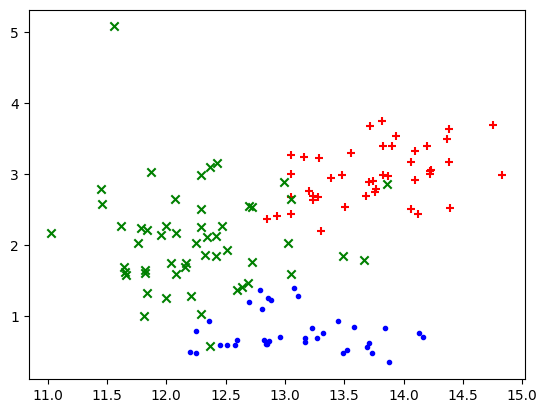

In [17]:
X = data[['alcohol', 'flavanoids']].to_numpy()
y = data[['class']].to_numpy()
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)
ytrain = label_binarize(ytrain, classes=[1, 2, 3])
plot_points(Xtrain, ytrain.argmax(axis=1))

The plotted data points again suggest some obvious linear boundaries between the three classes.

We can solve this problem as three one-vs-all problems, and re-use all the previous code. In this part, we will try another solution inspired from softmax function known as softmax regression (See C.Bishop, "Pattern Recognition and Machine Learning", 2006, Springer).

$$
SoftMax_\Theta(x, k) = \frac{e^{\theta_k^Tx}}{\sum\limits_{c=1}^K e^{\theta_c^Tx}}
$$

The cost function is defined as follows:

$$
J(\Theta) =-\frac{1}{N}\sum_{i=1}^{N}\sum_{k=1}^3\left[y_k^{i}\log\left(SoftMax_\Theta\left(x^{i}, k\right)\right)\right]
$$

- Propose a solution using the SoftMax function and test it with linear and quadratic separator? 

In [18]:
def softmax(w, x):
    w = w.reshape((x.shape[1], -1))
    K = w.shape[1]
    N = x.shape[0]
    y = np.zeros((N, K))
    for k in range(K):
        y[:, k] = np.exp(x.dot(w[:, k]))
    s = np.sum(y, axis = 1)
    y = np.diag(1./s) @ y
    return y

def cost(w, x, y):
    w = w.reshape((x.shape[1], -1))
    yhat = softmax(w, x)
    K = w.shape[1]
    s = 0
    for k in range(K):
        s += np.sum(y[:, k] * np.log(yhat[:, k])) 
    return -s / len(y) 

def grad(w, x, y):
    yhat = softmax(w, x)
    error = yhat - y
    return x.T @ error / x.shape[0] 

def train(X, y, maxfun=None):
    X = np.insert(X, 0, np.ones(len(X)), axis=1)
    theta = np.zeros((X.shape[1], y.shape[1]))
    result = fmin_tnc(func=cost, x0=theta, fprime=grad, disp=5, args=(X, y), maxfun=maxfun)
    
    return result[0].reshape((X.shape[1], -1))

W3 = train(Xtrain, ytrain, maxfun=1000)
print(W3)

W4 = train(transform(Xtrain), ytrain, maxfun=10000)
print(W4)


[[-22.82361389  42.32024108 -21.19913553]
 [  1.67540729  -2.89339138   2.92390241]
 [  0.0487252   -2.13471078 -10.48095324]]


  NIT   NF   F                       GTG
    0    1  1.098612288668110E+00   1.32143671E+00
tnc: stepmx = 1000
    1    6  6.480875088778242E-01   4.52923860E-01
    2   11  3.966675421994936E-01   1.16641388E+00
    3   16  3.433736359974726E-01   1.30658209E-01
    4   20  3.383580280897087E-01   3.97377864E-03
    5   25  3.178164628815170E-01   2.22751531E-03
tnc: fscale = 21.188
    6   30  2.628512935118643E-01   3.36267940E-03
    7   37  2.062990382006062E-01   1.32691697E-03
    8   42  2.041821961353758E-01   1.25920509E-04
    9   47  2.039399965164804E-01   2.39027044E-05
   10   52  2.036730750111793E-01   6.04195893E-05
   11   57  2.004218949537735E-01   2.12147006E-05
   12   60  2.002284814380233E-01   1.64722634E-06
tnc: fscale = 779.154
   13   65  2.001722941346604E-01   3.98421226E-07
   14   70  2.000952199685892E-01   8.12192906E-06
   15   74  2.000244302961264E-01   9.18149600E-06
   16   79  2.000227159236760E-01   3.29340611E-08
   17   84  2.000215170217464E

[[-207.31433639   84.62900815 -188.88055966]
 [-207.31433639   84.62900815 -188.88055966]
 [  56.48873574  -32.33620798   49.48112776]
 [ -21.11504242    5.15534479  -60.75860113]
 [  -3.12581516    0.40347336   -2.68372592]
 [   1.97641135   -1.47096177    6.25282594]
 [  -2.28530685    0.92645723  -20.14522732]]


  127  815  1.447746702815993E-01   1.81666014E-04
  128  823  1.445986977053544E-01   3.98321171E-05
  129  832  1.445575389392670E-01   1.27934598E-04
  130  840  1.445189233177090E-01   2.29445954E-06
  131  849  1.445075026518317E-01   4.86570450E-05
  132  857  1.444729543961168E-01   6.87780922E-06
  133  865  1.444477143929329E-01   1.75432310E-04
  134  873  1.440695383214647E-01   1.74171072E-03
  135  876  1.440666938776426E-01   1.36261259E-04
  136  884  1.437155587779745E-01   5.06064022E-04
  137  892  1.431995682501753E-01   1.93264549E-03
  138  895  1.431944524433587E-01   1.00222462E-04
  139  899  1.431937060048485E-01   4.99373553E-06
  140  906  1.431735156122218E-01   5.99284127E-04
  141  915  1.430993636345868E-01   6.43355721E-07
tnc: fscale = 1246.74
  142  922  1.430990250873622E-01   4.17932157E-08
  143  928  1.430963716254763E-01   2.02328377E-05
  144  935  1.430952896309216E-01   6.69858886E-07
  145  944  1.430916847335353E-01   2.53838264E-06
  146  95

- Compute the accuracy, the precision and the recall of these classifiers

accuracy: 0.9333333333333333
precision: 0.9315476190476191
recall: 0.9444444444444445
Confusion Matrix:  [[15  0  0]
 [ 1 15  2]
 [ 0  0 12]]
Normalized Confusion Matrix:  [[1.         0.         0.        ]
 [0.05555556 0.83333333 0.11111111]
 [0.         0.         1.        ]]


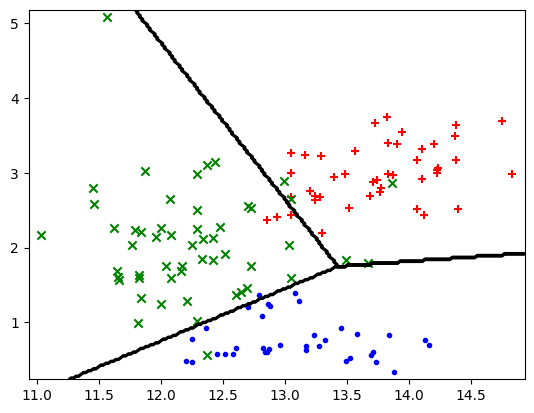

In [19]:
def predict_multi(x, w):
    x = np.insert(x, 0, np.ones(len(x)), axis=1)
    preds = softmax(w, x)
    return preds.argmax(axis=1)

predictions = predict_multi(Xtest, W3) + 1

print('accuracy:', metrics.accuracy_score(ytest, predictions))
print('precision:', metrics.precision_score(ytest, predictions, average='macro'))
print('recall:', metrics.recall_score(ytest, predictions, average='macro'))
print("Confusion Matrix: ", metrics.confusion_matrix(ytest, predictions, normalize=None))
print("Normalized Confusion Matrix: ", metrics.confusion_matrix(ytest, predictions, normalize='true'))

plot_points(Xtrain, ytrain.argmax(axis=1))
plot_boundary(Xtrain, lambda x: predict_multi(x, W3))

accuracy: 0.9333333333333333
precision: 0.9315476190476191
recall: 0.9444444444444445
Confusion Matrix:  [[15  0  0]
 [ 1 15  2]
 [ 0  0 12]]
Normalized Confusion Matrix:  [[1.         0.         0.        ]
 [0.05555556 0.83333333 0.11111111]
 [0.         0.         1.        ]]


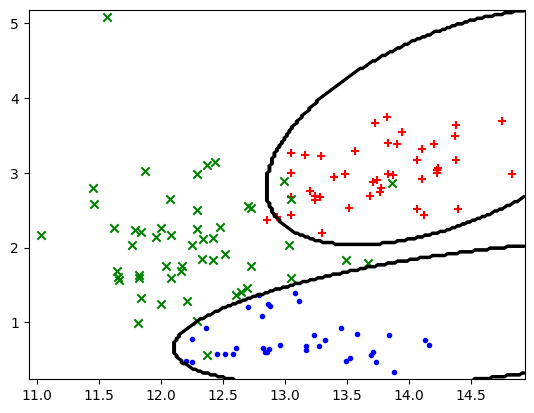

In [20]:
predictions = predict_multi(transform(Xtest), W4) + 1

print('accuracy:', metrics.accuracy_score(ytest, predictions))
print('precision:', metrics.precision_score(ytest, predictions, average='macro'))
print('recall:', metrics.recall_score(ytest, predictions, average='macro'))
print("Confusion Matrix: ", metrics.confusion_matrix(ytest, predictions, normalize=None))
print("Normalized Confusion Matrix: ", metrics.confusion_matrix(ytest, predictions, normalize='true'))

plot_points(Xtrain, ytrain.argmax(axis=1))
plot_boundary(Xtrain, lambda x: predict_multi(transform(x), W4))

- Conclude?

# Regularization

Next, we want to include all the features from the data set.

In [21]:
X = data.drop(labels='class', axis=1).to_numpy()
y = data['class'].to_numpy()
Xtrain, Xtest, Ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state = 25)
ytrain = label_binarize(ytrain, classes=[1, 2, 3])

Because we are now significantly increasing the number of features, we apply regularisation  as part of new cost and gradient functions.  As we have seen with linear regression, regularization prevents overfitting, a situation where a large number of features allows the classifier to fit the training set *too* exactly, meaning that it fails to generalize well and perform accurately on data it hasn't yet seen.

To avoid this problem, we add an additional term to the cost function

$$
J(\Theta) =-\frac{1}{N}\sum_{i=1}^{N}\sum_{k=1}^3\left[y_k^{i}\log\left(SoftMax_\Theta\left(x^{i}, k\right)\right)\right] + \frac{\lambda}{2}\left(\left\|\theta_1\right\|_2^2+\left\|\theta_2\right\|_2^2+\left\|\theta_3\right\|_2^2\right)
$$

- Compute the partiel derivatives of $J(\theta)$ and define the update formula of the gradient descent algorithm?

- Write a function that minimize $J(\theta)$ and test it on the WINE dataset?

In [22]:
from scipy.optimize import minimize

def grad(w, x, y, lamb):
    w = w.reshape((x.shape[1], -1))
    yhat = softmax(w, x)
    error = yhat - y
    return (x.T @ error / X.shape[0] + lamb * w).ravel()

def cost(w, x, y, lamb):
    w = w.reshape((x.shape[1], -1))
    yhat = softmax(w, x)
    K = w.shape[1]
    s = 0
    for k in range(K):
        s += np.sum(y[:, k] * np.log(yhat[:, k])) + lamb / 2 * np.linalg.norm(w[:,k])**2
    return -s / len(y)

def train(X, y, lamb, maxfun=None):
    X = np.insert(X, 0, np.ones(len(X)), axis=1)
    theta = np.zeros((X.shape[1], y.shape[1]))
    # result = fmin_tnc(func=cost, x0=theta, fprime=grad, disp=5, args=(X, y, lamb), maxfun=maxfun)
    # return result[0].reshape((X.shape[1], -1))

    result = minimize(fun=cost, x0=theta.flatten(), method = 'Newton-CG', jac=grad, args=(X, y, lamb), options={'maxiter' : maxfun})
    return result['x'].reshape((X.shape[1], -1))

W5 = train(Xtrain, ytrain, 2, maxfun=10000000)
print(W5)

[[-2.58929778e-05  3.08909024e-05 -4.99792462e-06]
 [-3.27294004e-04  3.84388872e-04 -5.70948678e-05]
 [-9.84536777e-06 -1.11496932e-05  2.09950610e-05]
 [-4.18612946e-05  4.43021932e-05 -2.44089863e-06]
 [-7.29700396e-04  7.56008434e-04 -2.63080380e-05]
 [-2.20634744e-03  3.74945065e-03 -1.54310321e-03]
 [-5.25398600e-05  5.20409421e-05  4.98917862e-07]
 [-5.14244885e-05  3.92198499e-05  1.22046386e-05]
 [-3.07885890e-06  1.04711160e-05 -7.39225706e-06]
 [-7.55310949e-05  5.41807885e-05  2.13503064e-05]
 [-3.11058521e-04  3.02032181e-04  9.02633976e-06]
 [-3.76313845e-06  2.31946085e-06  1.44367760e-06]
 [-3.87581032e-05  3.19593980e-05  6.79870519e-06]
 [ 3.28871836e-04 -2.59742137e-04 -6.91296982e-05]]


- Compare with non regularized version?

In [23]:
predictions = predict_multi(Xtest, W5) + 1
print('accuracy:', metrics.accuracy_score(ytest, predictions))
print('precision:', metrics.precision_score(ytest, predictions, average='macro'))
print('recall:', metrics.recall_score(ytest, predictions, average='macro'))

print("Confusion Matrix: ", metrics.confusion_matrix(ytest, predictions, normalize=None))
print("Normalized Confusion Matrix: ", metrics.confusion_matrix(ytest, predictions, normalize='true'))

accuracy: 0.7111111111111111
precision: 0.5428571428571428
recall: 0.5555555555555555
Confusion Matrix:  [[10  5  0]
 [ 0 22  0]
 [ 0  8  0]]
Normalized Confusion Matrix:  [[0.66666667 0.33333333 0.        ]
 [0.         1.         0.        ]
 [0.         1.         0.        ]]


/Users/reda/pythonEnv/Py312Sys/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


- Conclude?

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import PredefinedSplit

cv = PredefinedSplit(np.hstack(([-1] * Xtrain.shape[0], [0] * Xtest.shape[0])))

parameters = {
    'penalty' : ['l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg']
}

logreg = LogisticRegression()

clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=2)                      # number of folds

clf.fit(np.vstack((Xtrain, Xtest)) , np.hstack((Ytrain, ytest)))
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.9662921348314606
